<a href="https://colab.research.google.com/github/mlukomski/mlukomski.github.io/blob/main/LearningProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
# load data

url = 'https://raw.githubusercontent.com/mlukomski/mlukomski.github.io/244acabe6f608f198235e2269eb35960cad3105b/CPIAUCSL.csv'
cpi = pd.read_csv(url)

# Convert date column to datetime
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])

# Set date as index
cpi.set_index('observation_date', inplace=True)

cpi.head()

,CPIAUCSL
observation_date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [3]:
# Calculate Inflation Rate (% Change in CPI)
# Using a 12 month lag difference to calculate YoY inflation rate
cpi['Inflation_Rate'] = ((cpi['CPIAUCSL'] - cpi['CPIAUCSL'].shift(12)) / cpi['CPIAUCSL'].shift(12)) * 100

In [4]:
# Drop rows with NaN (first 12 months)
cpi.dropna(inplace=True)

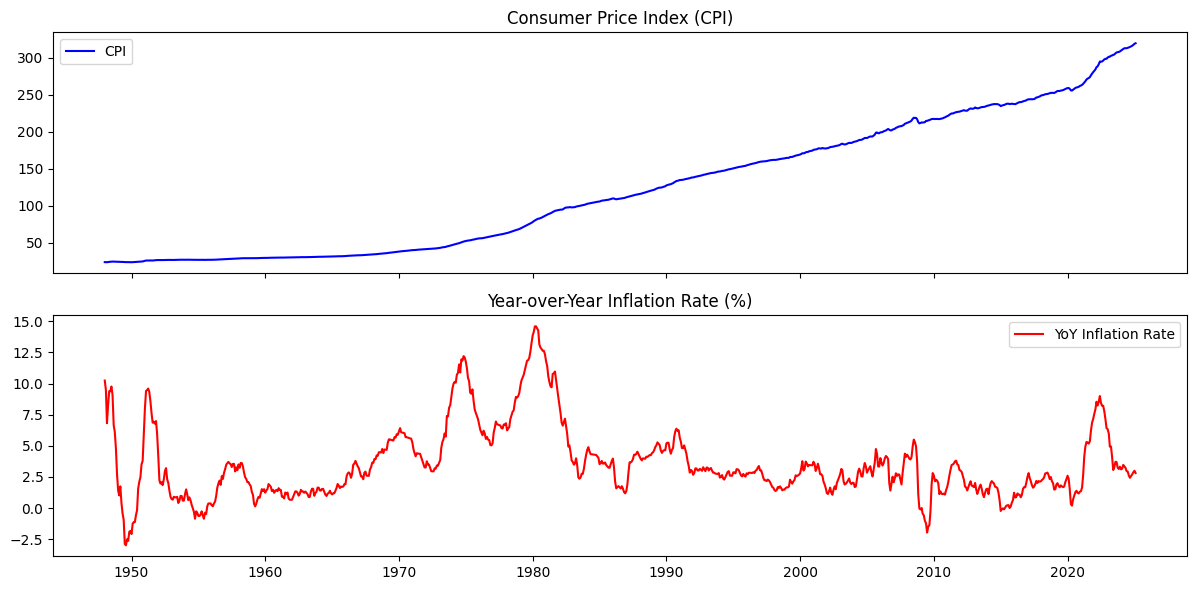

In [5]:
# Plot CPI and Inflation Rate
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# CPI Plot
ax[0].plot(cpi.index, cpi['CPIAUCSL'], label='CPI', color='blue')
ax[0].set_title('Consumer Price Index (CPI)')
ax[0].legend()

# Inflation Rate Plot
ax[1].plot(cpi.index, cpi['Inflation_Rate'], label='YoY Inflation Rate', color='red')
ax[1].set_title('Year-over-Year Inflation Rate (%)')
ax[1].legend()

plt.tight_layout()
plt.show()

In [6]:
# Load Unemployment Data
unemployment = pd.read_csv('https://raw.githubusercontent.com/mlukomski/mlukomski.github.io/244acabe6f608f198235e2269eb35960cad3105b/UNRATE.csv', parse_dates=['observation_date'])
unemployment.set_index('observation_date', inplace=True)

# Load Interest Rate Data (Federal Funds Rate)
fedfunds = 'https://raw.githubusercontent.com/mlukomski/mlukomski.github.io/244acabe6f608f198235e2269eb35960cad3105b/FEDFUNDS.csv'
interest_rates = pd.read_csv(fedfunds, parse_dates=['observation_date'])
interest_rates.set_index('observation_date', inplace=True)

# Merge all datasets
df = cpi.join(unemployment, how='inner').join(interest_rates, how='inner')

# rename columns
df.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
df.rename(columns={'UNRATE': 'Unemployment_Rate'}, inplace=True)
df.rename(columns={'FEDFUNDS': 'Interest_Rate'}, inplace=True)

# Drop NaNs
df.dropna(inplace=True)

df

,CPI,Inflation_Rate,Unemployment_Rate,Interest_Rate
observation_date,,,,
1954-07-01,26.860,0.261292,5.8,0.80
1954-08-01,26.850,0.000000,6.0,1.22
1954-09-01,26.810,-0.297508,6.1,1.07
1954-10-01,26.720,-0.853432,5.7,0.85
1954-11-01,26.780,-0.260708,5.3,0.83
...,...,...,...,...
2024-10-01,315.564,2.571403,4.1,4.83
2024-11-01,316.449,2.714168,4.2,4.64
2024-12-01,317.603,2.872366,4.1,4.48


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Performance:
Mean Absolute Error (MAE): 2.5930
Root Mean Squared Error (RMSE): 3.0112
R² Score: -1.2857


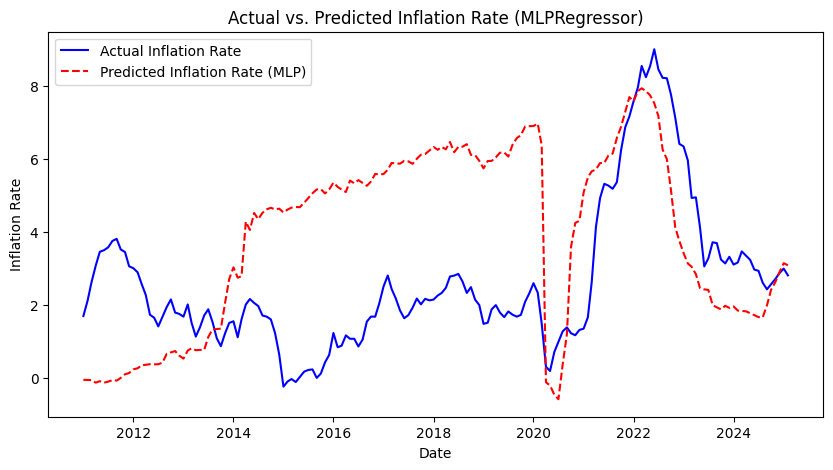

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Features (X) and Target (y)
X = df[['CPI', 'Unemployment_Rate', 'Interest_Rate']]
y = df['Inflation_Rate']

# Scale the features for better training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Build a Simple Neural Network with Scikit-Learn
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp.fit(X_train, y_train)

# Make Predictions
y_pred = mlp.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs. Predicted Inflation
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual Inflation Rate", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Inflation Rate (MLP)", linestyle='dashed', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Inflation Rate")
plt.title("Actual vs. Predicted Inflation Rate (MLPRegressor)")
plt.show()

Model Performance:
Mean Absolute Error (MAE): 2.9363
Root Mean Squared Error (RMSE): 3.4527
R² Score: -2.0050


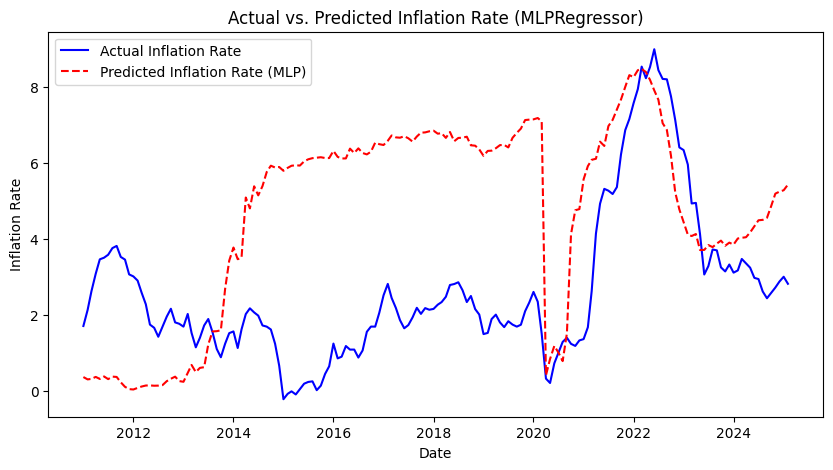

In [8]:
# trial two
# Define Features (X) and Target (y)
X = df[['CPI', 'Unemployment_Rate', 'Interest_Rate']]
y = df['Inflation_Rate']

# Scale the features for better training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Build a Simple Neural Network with Scikit-Learn
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', max_iter=1000)

mlp.fit(X_train, y_train)

# Make Predictions
y_pred = mlp.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Actual vs. Predicted Inflation
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual Inflation Rate", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Inflation Rate (MLP)", linestyle='dashed', color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Inflation Rate")
plt.title("Actual vs. Predicted Inflation Rate (MLPRegressor)")
plt.show()

In [25]:
# LSTM Model

!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features for LSTM Model
features = ['CPI', 'Unemployment_Rate', 'Interest_Rate']
target = 'Inflation_Rate'

# Scale data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])

# Convert to NumPy array
data = np.array(df_scaled)

# Define sequence length (how many past months to consider)
SEQ_LENGTH = 12  # Use past 12 months to predict next month's inflation

# Prepare sequences
X, y = [], []
for i in range(len(data) - SEQ_LENGTH):
    X.append(data[i:i+SEQ_LENGTH, :-1])  # All features except target
    y.append(data[i+SEQ_LENGTH, -1])  # Target (Inflation Rate)

X, y = np.array(X), np.array(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [10]:
class InflationLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(InflationLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))  # Forward pass
        out = self.fc(out[:, -1, :])  # Take output from the last time step
        return out

# Model Parameters
INPUT_SIZE = len(features)  # Number of input features
HIDDEN_SIZE = 128  # Number of LSTM neurons
NUM_LAYERS = 3  # Number of LSTM layers
OUTPUT_SIZE = 1  # Predicting one value (inflation rate)

model = InflationLSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE)

In [11]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.0308
Epoch [20/100], Loss: 0.0291
Epoch [30/100], Loss: 0.0252
Epoch [40/100], Loss: 0.0159
Epoch [50/100], Loss: 0.0148
Epoch [60/100], Loss: 0.0132
Epoch [70/100], Loss: 0.0126
Epoch [80/100], Loss: 0.0120
Epoch [90/100], Loss: 0.0112
Epoch [100/100], Loss: 0.0100


In [12]:
model.eval()
y_pred = model(X_test_torch).detach().numpy()

# Convert back to original scale
y_test_scaled = y_test.reshape(-1, 1)
y_pred_scaled = y_pred.reshape(-1, 1)

# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



Model Performance:
Mean Absolute Error (MAE): 0.0819
Root Mean Squared Error (RMSE): 0.1359
R² Score: -0.2620


In [21]:
# import new variable Money Supply

m2 = 'https://raw.githubusercontent.com/mlukomski/mlukomski.github.io/811532fb08798d315e34d99585b1b9d5386166f3/M2REAL.csv'

money_supply = pd.read_csv(m2, parse_dates=['observation_date'])
money_supply.set_index('observation_date', inplace=True)


data = df.join(money_supply, how = 'inner')

# Drop NaNs
data.dropna(inplace=True)

data.rename(columns={
    'CPIAUCSL': 'CPI',
    'UNRATE': 'Unemployment_Rate',
    'FEDFUNDS': 'Interest_Rate',
    'M2REAL': 'Money_Supply'
}, inplace=True)

data_df = data.copy()
data_df

,CPI,Inflation_Rate,Unemployment_Rate,Interest_Rate,Money_Supply
observation_date,,,,,
1959-01-01,29.010,1.291899,6.0,2.48,987.9
1959-02-01,29.000,1.045296,5.9,2.43,992.1
1959-03-01,28.970,0.346380,5.6,2.80,998.3
1959-04-01,28.980,0.138217,5.2,2.96,1001.0
1959-05-01,29.040,0.345543,5.1,2.90,1006.2
...,...,...,...,...,...
2024-10-01,315.564,2.571403,4.1,4.83,6761.1
2024-11-01,316.449,2.714168,4.2,4.64,6779.8
2024-12-01,317.603,2.872366,4.1,4.48,6766.3


In [14]:
# Select features, including Money Supply
features = ['CPI', 'Unemployment_Rate', 'Interest_Rate', 'Money_Supply']
target = 'Inflation_Rate'

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features + [target]])

# Convert to NumPy array
data = np.array(data_scaled)

# Define sequence length (past months used for prediction)
SEQ_LENGTH = 24  # Using past 24 months instead of 12

# Prepare sequences
X, y = [], []
for i in range(len(data) - SEQ_LENGTH):
    X.append(data[i:i+SEQ_LENGTH, :-1])  # All features except target
    y.append(data[i+SEQ_LENGTH, -1])  # Target (Inflation Rate)

X, y = np.array(X), np.array(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# define improved model
class InflationLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.2):
        super(InflationLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))  # Forward pass
        out = self.fc(out[:, -1, :])  # Take output from last time step
        return out

# Model Parameters
INPUT_SIZE = len(features)  # Number of input features (now 4)
HIDDEN_SIZE = 128  # Increase neurons
NUM_LAYERS = 4  # Add another LSTM layer
OUTPUT_SIZE = 1  # Predicting one value (inflation rate)
DROPOUT_RATE = 0.3  # Helps prevent overfitting

model = InflationLSTM(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_RATE)

In [15]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Lower learning rate

# Training loop
EPOCHS = 150
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}")


Epoch [10/150], Loss: 0.0469
Epoch [20/150], Loss: 0.0318
Epoch [30/150], Loss: 0.0305
Epoch [40/150], Loss: 0.0304
Epoch [50/150], Loss: 0.0295
Epoch [60/150], Loss: 0.0280
Epoch [70/150], Loss: 0.0245
Epoch [80/150], Loss: 0.0198
Epoch [90/150], Loss: 0.0177
Epoch [100/150], Loss: 0.0163
Epoch [110/150], Loss: 0.0152
Epoch [120/150], Loss: 0.0137
Epoch [130/150], Loss: 0.0121
Epoch [140/150], Loss: 0.0095
Epoch [150/150], Loss: 0.0083


In [16]:
model.eval()
y_pred = model(X_test_torch).detach().numpy()

# Convert back to original scale
y_test_scaled = y_test.reshape(-1, 1)
y_pred_scaled = y_pred.reshape(-1, 1)

# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
r2 = r2_score(y_test_scaled, y_pred_scaled)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 0.0804
Root Mean Squared Error (RMSE): 0.1080
R² Score: 0.2617


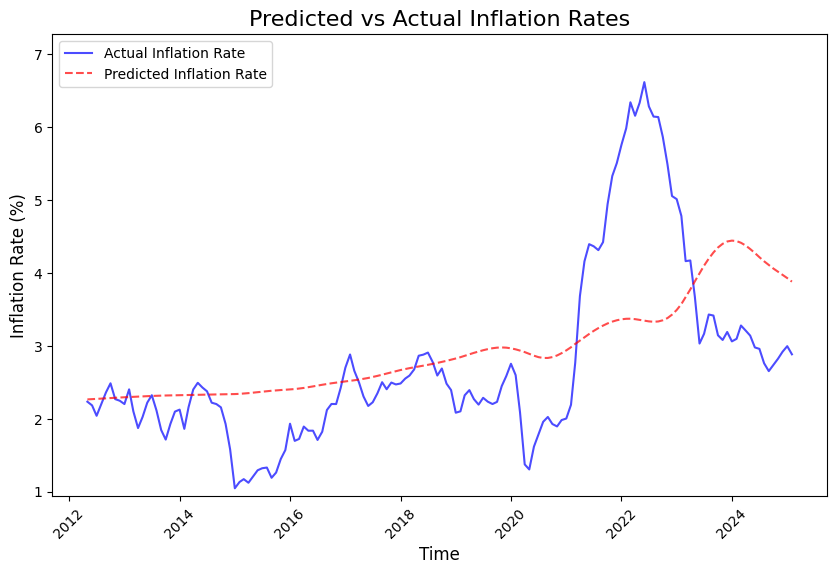

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure values are in the correct range
y_test = np.array(y_test).flatten() / 100  # Convert to percentage
y_pred = np.array(y_pred).flatten() / 100  # Convert to percentage

# Get the corresponding index for the test set
test_dates = data_df.index[-len(y_test):]

# Plot actual vs. predicted inflation rates
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual Inflation Rate', color='blue', alpha=0.7)
plt.plot(test_dates, y_pred, label='Predicted Inflation Rate', color='red', linestyle='--', alpha=0.7)

# Adding title and labels
plt.title('Predicted vs Actual Inflation Rates', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Set y-axis limits dynamically
plt.ylim(min(y_test.min(), y_pred.min()) * 0.9, max(y_test.max(), y_pred.max()) * 1.1)

# Display legend
plt.legend()

# Show plot
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

model.eval()  # Set the model to evaluation mode

# Assume future_data is a DataFrame with future CPI, Unemployment Rate, Interest Rate, Money Supply
# Example (replace these with real future values)
future_data = pd.DataFrame({
    'CPIAUCSL': [320.0, 321.5, 323.0],  # Example CPI values
    'UNRATE': [4.1, 4.0, 3.9],          # Example Unemployment Rate values
    'FEDFUNDS': [4.3, 4.2, 4.1],        # Example Interest Rate values
    'M2REAL': [21200, 21400, 21500]     # Example Money Supply values
})

# Ensure data is scaled with the same scaler used for training
scaler = MinMaxScaler()
future_scaled = scaler.fit_transform(future_data)  # Use the same scaler from training

# Convert to PyTorch tensor and reshape for LSTM
future_tensor = torch.tensor(future_scaled, dtype=torch.float32).unsqueeze(1)

# Make predictions
with torch.no_grad():
    predicted_inflation = model(future_tensor)

# Convert predictions back to original scale (if necessary)
predicted_inflation = predicted_inflation.numpy().flatten()

# Display predictions
future_data['Predicted_Inflation'] = predicted_inflation
print(future_data)


   CPIAUCSL  UNRATE  FEDFUNDS  M2REAL  Predicted_Inflation
0     320.0     4.1       4.3   21200             0.004358
1     321.5     4.0       4.2   21400             0.001549
2     323.0     3.9       4.1   21500            -0.001503
